In [ ]:
import pandas as pd
data = pd.read_csv('listings_final1.csv')
print(data.shape)
print(data.head())

(21469, 40)
             id                                      listing_url  \
0  9.773960e+17  https://www.airbnb.com/rooms/977395984065981849   
1  6.480340e+17  https://www.airbnb.com/rooms/648033676238017128   
2  8.719910e+17  https://www.airbnb.com/rooms/871990853610302281   
3  1.594350e+07            https://www.airbnb.com/rooms/15943497   
4  8.455970e+17  https://www.airbnb.com/rooms/845596919658541172   

                                                name  \
0      Home in Brooklyn · 1 bedroom · 1 bed · 1 bath   
1  Rental unit in Bronx · ★4.89 · 1 bedroom · 1 b...   
2  Rental unit in Queens · ★New · 1 bedroom · Hal...   
3  Home in Brooklyn · ★4.74 · 1 bedroom · 1 bed ·...   
4  Rental unit in Brooklyn · 4 bedrooms · 1 bed ·...   

                                         description  \
0  This unique place has a style all its own. Is ...   
1  Welcome to this beautiful cozy bedroom in a sp...   
2      Kick back and relax in this calm, open space.   
3  Our home is ste

In [ ]:
print(data.shape)

(21469, 40)


In [ ]:
df = pd.DataFrame(data)
null_counts = df.isna().sum()
print(null_counts)

id                                  0
listing_url                         0
name                                0
description                       719
picture_url                         0
host_id                             0
host_url                            0
host_name                           4
host_location                    4959
host_response_time              10284
host_response_rate              10284
host_acceptance_rate             7519
host_neighbourhood               4188
host_listings_count                 4
host_total_listings_count           4
host_verifications                  4
host_identity_verified              4
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
property_type                       0
room_type                           1
accommodates                        1
bathrooms                        8751
bathrooms_text                     24
bedrooms                         3558
beds                             8818
amenities   

In [ ]:
df.dropna(subset=['id', 'name', 'host_id', 'host_name', 'property_type', 'room_type'], inplace=True)

# Fill columns with 'not available' or default values
fill_na_cols = ['listing_url', 'picture_url', 'description', 'host_neighbourhood', 'neighbourhood_cleansed',
                'neighbourhood_group_cleansed', 'bathrooms_text', 'amenities']
df[fill_na_cols] = df[fill_na_cols].fillna('not available')

# Fill 'host_location' with default 'New York, NY'
df['host_location'].fillna('New York, NY', inplace=True)

# Fill 'host_response_rate', 'host_acceptance_rate', 'host_response_time' with 'no response', '0%'
df['host_response_time'].fillna('no response', inplace=True)
df['host_response_rate'].fillna('0%', inplace=True)
df['host_acceptance_rate'].fillna('0%', inplace=True)

# Fill missing values with 1
fill_one_cols = ['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights']
df[fill_one_cols] = df[fill_one_cols].fillna(1)

# Fill 'host_verifications' with ['email','phone']
df['host_verifications'].fillna("['email','phone']", inplace=True)

# Fill 'host_identity_verified', 'has_availability' with 't'
fill_t_cols = ['host_identity_verified', 'has_availability']
df[fill_t_cols] = df[fill_t_cols].fillna('t')

# Fill 'maximum_nights' with 365
df['maximum_nights'].fillna(365, inplace=True)

# Remove special characters and convert to numeric
df['price'] = df['price'].str.replace('[\$,]', '', regex=True).astype(float)

# Fill 'price' with mean value
mean_price = df['price'].mean()
df['price'].fillna(mean_price, inplace=True)

# Fill review related columns with 0
review_cols = ['number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
               'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
               'review_scores_location', 'review_scores_value']
df[review_cols] = df[review_cols].fillna(0)

# Display the processed dataframe
print(df)

                 id                                      listing_url  \
0      9.773960e+17  https://www.airbnb.com/rooms/977395984065981849   
1      6.480340e+17  https://www.airbnb.com/rooms/648033676238017128   
2      8.719910e+17  https://www.airbnb.com/rooms/871990853610302281   
3      1.594350e+07            https://www.airbnb.com/rooms/15943497   
4      8.455970e+17  https://www.airbnb.com/rooms/845596919658541172   
...             ...                                              ...   
21463  7.270950e+17  https://www.airbnb.com/rooms/727094751882208933   
21464  4.293636e+07            https://www.airbnb.com/rooms/42936364   
21465  2.052297e+07            https://www.airbnb.com/rooms/20522971   
21466  2.053249e+07            https://www.airbnb.com/rooms/20532490   
21467  9.349221e+06             https://www.airbnb.com/rooms/9349221   

                                                    name  \
0          Home in Brooklyn · 1 bedroom · 1 bed · 1 bath   
1      Rental u

In [ ]:
null_counts = df.isna().sum()
print(null_counts)

id                              0
listing_url                     0
name                            0
description                     0
picture_url                     0
host_id                         0
host_url                        0
host_name                       0
host_location                   0
host_response_time              0
host_response_rate              0
host_acceptance_rate            0
host_neighbourhood              0
host_listings_count             0
host_total_listings_count       0
host_verifications              0
host_identity_verified          0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       0
bathrooms_text                  0
bedrooms                        0
beds                            0
amenities                       0
price                           0
minimum_nights                  0
maximum_nights

In [ ]:
df.to_csv('preprocessed_data.csv', index=False)

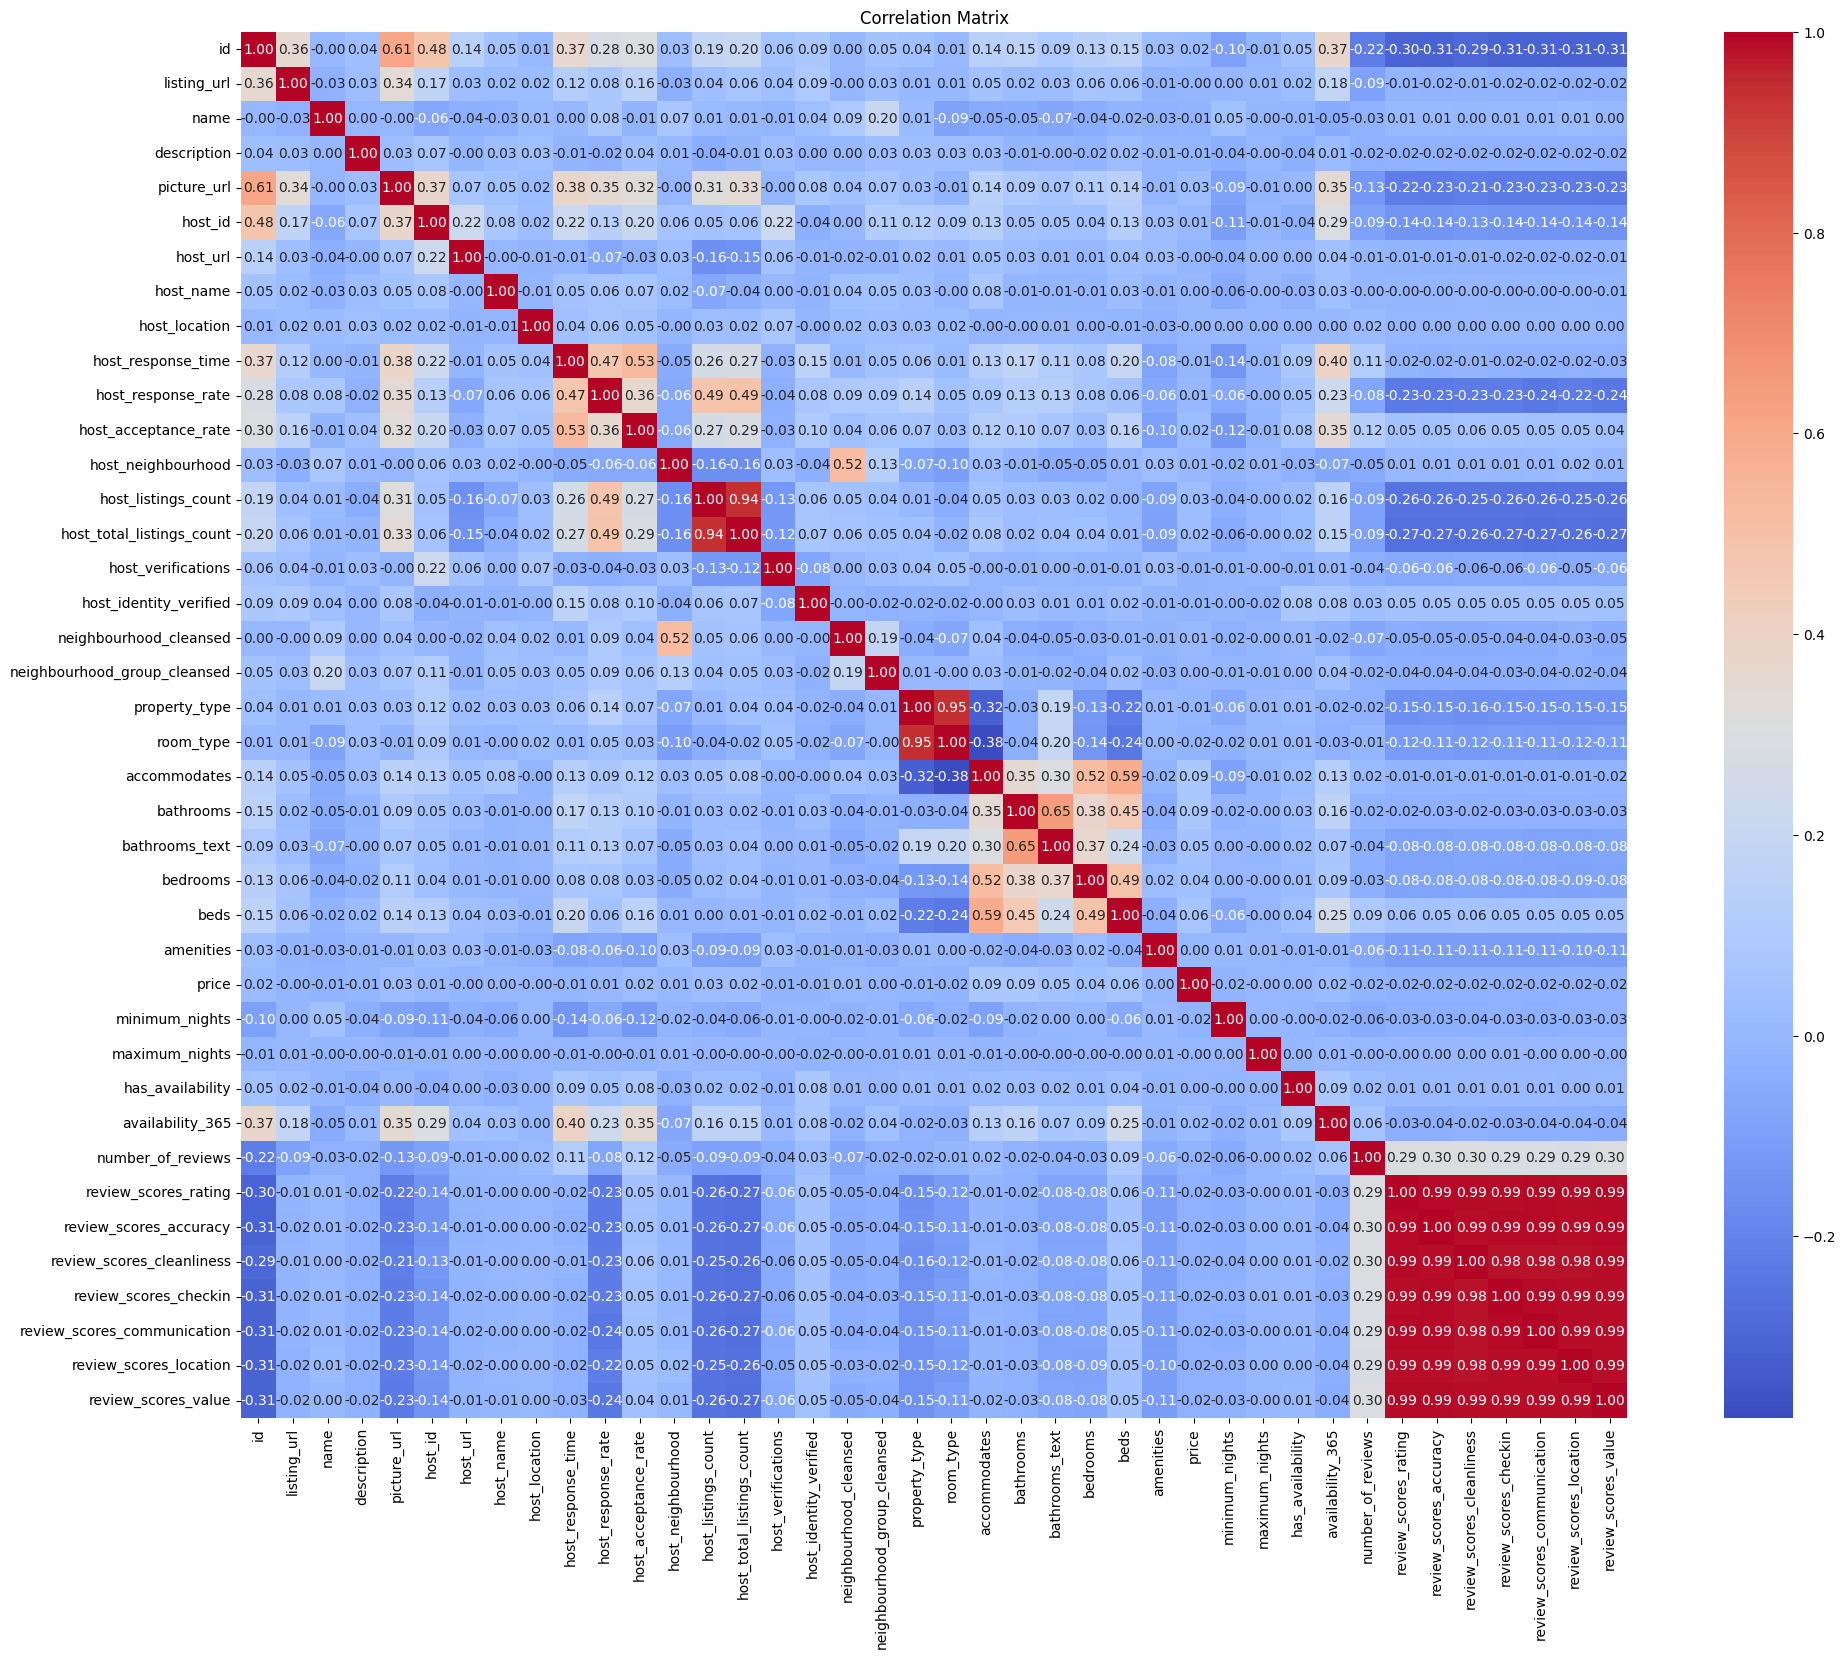

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv('/content/preprocessed_data.csv')

# Convert price to numeric if it contains strings
if data['price'].dtype == 'object':
    data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Encode non-numeric columns
label_encoders = {}
for col in data.columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Convert to float if necessary
for col in data.columns:
    if data[col].dtype == 'object':
        try:
            data[col] = data[col].astype(float)
        except ValueError:
            pass  # if conversion fails, column remains as object

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(25, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Load the dataset
data = pd.read_csv('preprocessed_data.csv')

# Select relevant features
features = ['host_location', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms','price','review_scores_rating', 'host_neighbourhood']
data = data[features]

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score
from sklearn.metrics import pairwise_distances
import numpy as np

# Load the dataset
data = pd.read_csv('preprocessed_data.csv')

# Select relevant features
features = ['host_location', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating', 'host_neighbourhood']
data = data[features]

# Normalize numerical variables
scaler = MinMaxScaler()
data[['accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating']] = scaler.fit_transform(data[['accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating']])

# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
for feature in ['host_location', 'property_type', 'room_type', 'host_neighbourhood']:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=3)
clusters = dbscan.fit_predict(data)

# Compute silhouette score
silhouette = silhouette_score(data, clusters)
print("Silhouette Score:", silhouette)

# Compute Davies-Bouldin score
davies_bouldin = davies_bouldin_score(data, clusters)
print("Davies-Bouldin Score:", davies_bouldin)

# Compute Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(data, clusters)
print("Calinski-Harabasz Index:", calinski_harabasz)

# Add clusters to the original dataframe
data['cluster'] = clusters

# Function to recommend listings based on cluster and review ratings
def recommend_listings(user_input, num_recommendations=100, similarity_threshold=0.9, algorithm_name="DBSCAN"):
    # Convert user input to a DataFrame
    user_data = pd.DataFrame([user_input], columns=features)

    # Normalize numerical variables
    user_data[['accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating']] = scaler.transform(user_data[['accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating']])

    # Convert categorical variables to numerical using Label Encoding
    for feature in ['host_location', 'property_type', 'room_type', 'host_neighbourhood']:
        le = label_encoders[feature]
        # Handle unknown labels by assigning a new label
        unknown_label = le.classes_.shape[0]  # Get the current number of classes as the new label
        user_data[feature] = le.transform([user_input[feature]])[0] if user_input[feature] in le.classes_ else unknown_label

    # Predict cluster for user input
    user_cluster = dbscan.fit_predict(user_data)[0]

    # Recommend listings from the same cluster
    cluster_data = data[data['cluster'] == user_cluster].drop(columns=['cluster'])  # Drop the 'cluster' column

    # Compute cosine similarity for all features
    user_data_matrix = user_data.values.reshape(1, -1)  # Reshape to ensure proper input dimensions
    cluster_data_matrix = cluster_data.values  # No reshaping needed for cluster data
    similarities = cosine_similarity(user_data_matrix, cluster_data_matrix)

    # Add similarity scores to the cluster_data dataframe
    cluster_data['similarity_score'] = similarities.flatten()

    # Filter listings based on similarity threshold
    similar_listings = cluster_data[cluster_data['similarity_score'] >= similarity_threshold].sort_values(by='similarity_score', ascending=False)

    # Limit the number of recommendations
    similar_listings = similar_listings.head(num_recommendations)

    # Add algorithm name as a new column
    similar_listings['algorithm_name'] = algorithm_name

    # Inverse normalize numerical variables
    similar_listings[['accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating']] = scaler.inverse_transform(similar_listings[['accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating']])

    # Reverse label encoding for categorical variables
    for feature in ['host_location', 'property_type', 'room_type', 'host_neighbourhood']:
        le = label_encoders[feature]
        similar_listings[feature] = le.inverse_transform(similar_listings[feature])

    return similar_listings[features + ['similarity_score', 'algorithm_name']]

# Define 3 user inputs
user_inputs = [
    {
        'host_location': 'New York, United States','property_type': 'Entire bungalow','room_type': 'Entire home/apt','accommodates': 3,'bathrooms': 1,
        'bedrooms': 2,'review_scores_rating': 4.95, 'host_neighbourhood': 'West Bronx'
    },
    {
        'host_location': 'New York, NY','property_type': 'Private room in home','room_type': 'Entire home/apt','accommodates':2 ,'bathrooms': 1,
        'bedrooms': 1,'review_scores_rating': 4.2, 'host_neighbourhood': 'Ocean Hill'
    },
    {
        'host_location': 'New York, United States','property_type': 'Entire rental unit','room_type': 'Entire home/apt','accommodates': 4,'bathrooms': 1,
        'bedrooms': 1,'review_scores_rating': 4.5, 'host_neighbourhood': 'Prospect Lefferts Gardens'
    }
]

# Store recommended listings for each user input
all_recommended_listings = []

# Perform recommendations for each user input
for user_input in user_inputs:
    recommended_listings = recommend_listings(user_input, num_recommendations=100, similarity_threshold=0.9, algorithm_name="DBSCAN")
    all_recommended_listings.append(recommended_listings)

# Concatenate all recommended listings into a single DataFrame
all_recommended_listings_df = pd.concat(all_recommended_listings, ignore_index=True)

# Select top 100 recommendations based on similarity score
top_100_unique_recommendations = all_recommended_listings_df.sort_values(by='similarity_score', ascending=False).drop_duplicates().head(100)

# Save top 100 unique recommendations to CSV file
filename = "top_100_unique_recommendations_dbscan.csv"
top_100_unique_recommendations.to_csv(filename, index=False)

print(top_100_unique_recommendations)


Silhouette Score: 0.4457425403442836
Davies-Bouldin Score: 1.8282769260875864
Calinski-Harabasz Index: 66.46118377243164
         host_location                property_type        room_type  \
200       New York, NY           Entire rental unit  Entire home/apt   
0         New York, NY                 Entire condo  Entire home/apt   
201      Nashville, TN           Entire rental unit  Entire home/apt   
202       New York, NY             Entire townhouse  Entire home/apt   
203       New York, NY             Entire townhouse  Entire home/apt   
..                 ...                          ...              ...   
21        New York, NY                 Entire place  Entire home/apt   
121  Sydney, Australia  Private room in rental unit     Private room   
22         Olympia, WA           Entire rental unit  Entire home/apt   
23        New York, NY                 Entire condo  Entire home/apt   
122             Taiwan  Private room in rental unit     Private room   

     accommoda

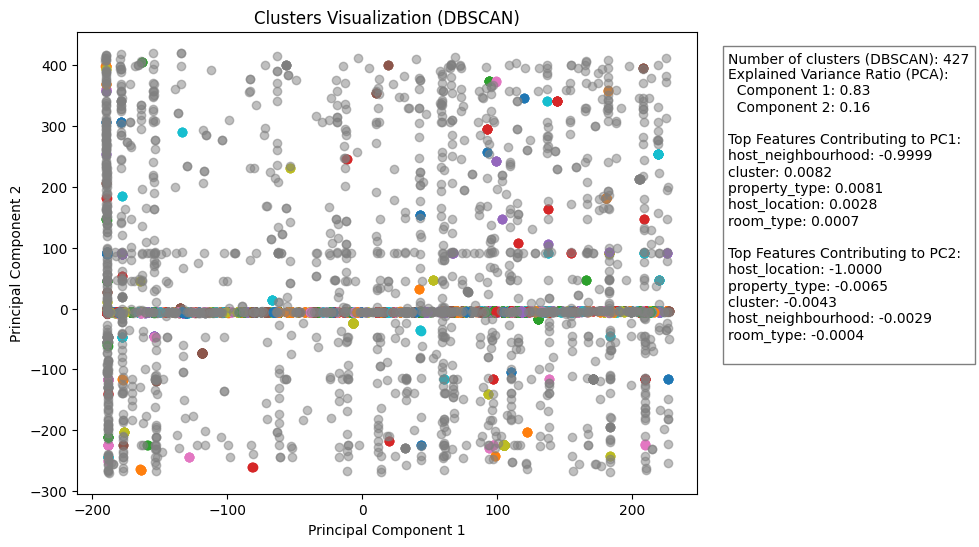

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

# Reduce dimensionality of data using PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=3)
clusters_db = dbscan.fit_predict(data_2d)

# Plot clusters from DBSCAN
fig, ax = plt.subplots(figsize=(8, 6))
unique_clusters = set(clusters_db)
for cluster_label in unique_clusters:
    if cluster_label == -1:
        ax.scatter(data_2d[clusters_db == cluster_label, 0], data_2d[clusters_db == cluster_label, 1],
                   label='DBSCAN Noise', color='gray', alpha=0.5)
    else:
        ax.scatter(data_2d[clusters_db == cluster_label, 0], data_2d[clusters_db == cluster_label, 1],
                   label=f'DBSCAN Cluster {cluster_label}')
ax.set_title('Clusters Visualization (DBSCAN)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Get the components
components = pca.components_

# Assuming data is a DataFrame and has columns
feature_names = data.columns

# Sort features based on their contribution to PC1 and PC2
pc1_features = [(feature, weight) for feature, weight in zip(feature_names, components[0])]
pc1_features.sort(key=lambda x: abs(x[1]), reverse=True)

pc2_features = [(feature, weight) for feature, weight in zip(feature_names, components[1])]
pc2_features.sort(key=lambda x: abs(x[1]), reverse=True)

# Add description box
description_box = (
    f"Number of clusters (DBSCAN): {len(unique_clusters) - (1 if -1 in unique_clusters else 0)}\n"  # Count the number of clusters in DBSCAN
    f"Explained Variance Ratio (PCA):\n"
    f"  Component 1: {explained_variance_ratio[0]:.2f}\n"
    f"  Component 2: {explained_variance_ratio[1]:.2f}\n\n"
    "Top Features Contributing to PC1:\n"
)
for feature, weight in pc1_features[:5]:  # Only showing top 5 features
    description_box += f"{feature}: {weight:.4f}\n"

description_box += "\nTop Features Contributing to PC2:\n"
for feature, weight in pc2_features[:5]:  # Only showing top 5 features
    description_box += f"{feature}: {weight:.4f}\n"

plt.text(1.05, 0.3, description_box, bbox=dict(facecolor='white', alpha=0.5), fontsize=10, transform=ax.transAxes)

#plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
)

# Load the dataset
data = pd.read_csv('preprocessed_data.csv')

# Select relevant features
features = ['host_location', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating', 'host_neighbourhood']
data = data[features]

# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
for feature in ['host_location', 'property_type', 'room_type', 'host_neighbourhood']:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# Normalize numerical variables
scaler = MinMaxScaler()
data[['accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating']] = scaler.fit_transform(data[['accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating']])

# KMeans clustering
num_clusters = 10  # You need to specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(data)

# Compute evaluation metrics
silhouette = silhouette_score(data, clusters)
print("Silhouette Score:", silhouette)

davies_bouldin = davies_bouldin_score(data, clusters)
print("Davies-Bouldin Score:", davies_bouldin)

calinski_harabasz = calinski_harabasz_score(data, clusters)
print("Calinski-Harabasz Index:", calinski_harabasz)

# Add clusters to the original dataframe
data['cluster'] = clusters

# Function to recommend listings based on cluster and review ratings
def recommend_listings(user_input, num_recommendations=100, similarity_threshold=0.9, algorithm_name="KMeans"):
    # Convert user input to a DataFrame
    user_data = pd.DataFrame([user_input], columns=features)

    # Convert categorical variables to numerical using Label Encoding
    for feature in ['host_location', 'property_type', 'room_type', 'host_neighbourhood']:
        le = label_encoders[feature]
        # Handle unknown labels by assigning a new label
        unknown_label = le.classes_.shape[0]  # Get the current number of classes as the new label
        user_data[feature] = le.transform([user_input[feature]])[0] if user_input[feature] in le.classes_ else unknown_label

    # Predict cluster for user input
    user_cluster = kmeans.predict(user_data)[0]

    # Recommend listings from the same cluster
    cluster_data = data[data['cluster'] == user_cluster].drop(columns=['cluster'])  # Drop the 'cluster' column

    # Compute cosine similarity
    user_data_matrix = user_data.values.reshape(1, -1)  # Reshape to ensure proper input dimensions
    cluster_data_matrix = cluster_data.values  # No reshaping needed for cluster data
    similarities = cosine_similarity(user_data_matrix, cluster_data_matrix)

    # Add similarity scores to the cluster_data dataframe
    cluster_data['similarity_score'] = similarities.flatten()

    # Filter listings based on similarity threshold
    similar_listings = cluster_data[cluster_data['similarity_score'] >= similarity_threshold].sort_values(by='similarity_score', ascending=False)

    # Limit the number of recommendations
    similar_listings = similar_listings.head(num_recommendations)

    # Add algorithm name as a new column
    similar_listings['algorithm_name'] = algorithm_name

    # Reverse label encoding for categorical variables
    for feature in ['host_location', 'property_type', 'room_type', 'host_neighbourhood']:
        le = label_encoders[feature]
        similar_listings[feature] = le.inverse_transform(similar_listings[feature])

    # Inverse normalize numerical variables
    similar_listings[['accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating']] = scaler.inverse_transform(similar_listings[['accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating']])

    return similar_listings[['host_location', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating', 'host_neighbourhood', 'similarity_score', 'algorithm_name']]

# Define 3 user inputs
user_inputs = [
    {
        'host_location': 'New York, United States', 'property_type': 'Entire bungalow', 'room_type': 'Entire home/apt', 'accommodates': 3, 'bathrooms': 1,
        'bedrooms': 2, 'review_scores_rating': 4.95, 'host_neighbourhood': 'West Bronx'
    },
    {
        'host_location': 'New York, NY', 'property_type': 'Private room in home', 'room_type': 'Entire home/apt', 'accommodates': 2, 'bathrooms': 1,
        'bedrooms': 1, 'review_scores_rating': 4.2, 'host_neighbourhood': 'Ocean Hill'
    },
    {
        'host_location': 'New York, United States', 'property_type': 'Entire rental unit', 'room_type': 'Entire home/apt', 'accommodates': 4, 'bathrooms': 1,
        'bedrooms': 1, 'review_scores_rating': 4.5, 'host_neighbourhood': 'Prospect Lefferts Gardens'
    }
]

# Store recommended listings for each user input
all_recommended_listings = []

# Perform recommendations for each user input
for user_input in user_inputs:
    recommended_listings = recommend_listings(user_input, num_recommendations=100, similarity_threshold=0.9, algorithm_name="KMeans")
    all_recommended_listings.append(recommended_listings)

# Concatenate all recommended listings into a single DataFrame
all_recommended_listings_df = pd.concat(all_recommended_listings, ignore_index=True)

# Select top 100 recommendations based on similarity score
top_100_unique_recommendations = all_recommended_listings_df.sort_values(by='similarity_score', ascending=False).drop_duplicates().head(100)

# Save top 100 unique recommendations to CSV file
filename = "top_100_unique_recommendations_kmeans.csv"
top_100_unique_recommendations.to_csv(filename, index=False)

print(top_100_unique_recommendations)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.5015125506922491
Davies-Bouldin Score: 0.6897327361407275
Calinski-Harabasz Index: 48638.12822305441
               host_location         property_type        room_type  \
100             New York, NY  Private room in home     Private room   
101             New York, NY  Private room in home     Private room   
102  New York, United States  Private room in home     Private room   
103  New York, United States  Private room in home     Private room   
104             New York, NY  Private room in home     Private room   
..                       ...                   ...              ...   
4               New York, NY           Entire home  Entire home/apt   
287             New York, NY           Entire home  Entire home/apt   
5               New York, NY          Entire condo  Entire home/apt   
288             New York, NY           Entire home  Entire home/apt   
289             New York, NY           Entire home  Entire home/apt   

     accommodates  bathroo

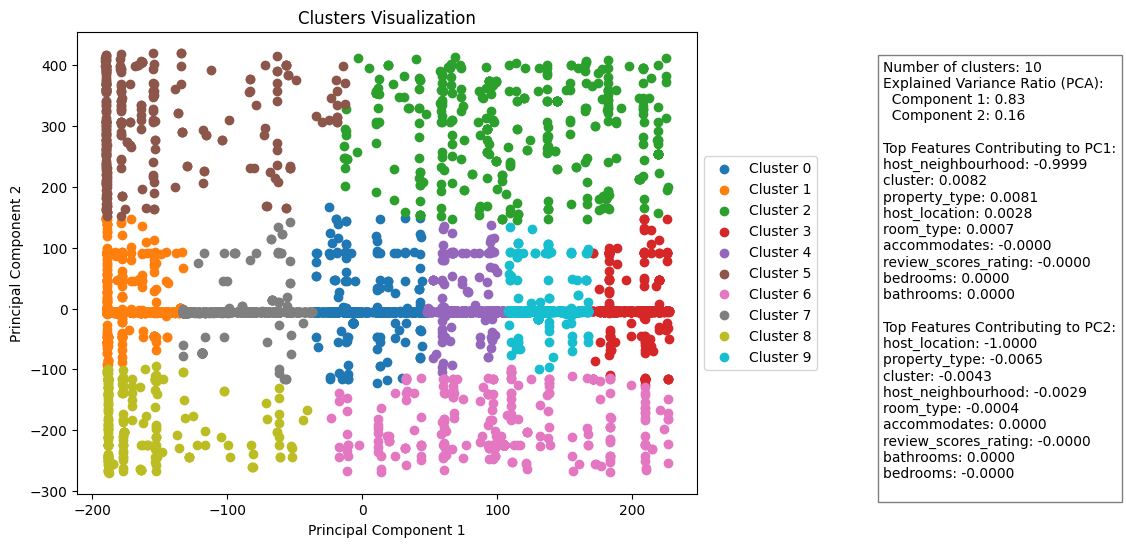

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality of data
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Plot clusters
fig, ax = plt.subplots(figsize=(8,6))
for cluster_label in range(num_clusters):
    ax.scatter(data_2d[clusters == cluster_label, 0], data_2d[clusters == cluster_label, 1], label=f'Cluster {cluster_label}')
ax.set_title('Clusters Visualization')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# Move legend to the right of the plot
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Get the components
components = pca.components_

# Sort features based on their contribution to PC1 and PC2
pc1_features = [(feature, weight) for feature, weight in zip(data.columns, components[0])]
pc1_features.sort(key=lambda x: abs(x[1]), reverse=True)

pc2_features = [(feature, weight) for feature, weight in zip(data.columns, components[1])]
pc2_features.sort(key=lambda x: abs(x[1]), reverse=True)

# Add description box
description_box = (
    f"Number of clusters: {num_clusters}\n"
    f"Explained Variance Ratio (PCA):\n"
    f"  Component 1: {explained_variance_ratio[0]:.2f}\n"
    f"  Component 2: {explained_variance_ratio[1]:.2f}\n\n"
    "Top Features Contributing to PC1:\n"
)
for feature, weight in pc1_features:
    description_box += f"{feature}: {weight:.4f}\n"

description_box += "\nTop Features Contributing to PC2:\n"
for feature, weight in pc2_features:
    description_box += f"{feature}: {weight:.4f}\n"

plt.text(1.3,0, description_box, bbox=dict(facecolor='white', alpha=0.5), fontsize=10, transform=ax.transAxes)

plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
)
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
data = pd.read_csv('preprocessed_data.csv')

# Select relevant features
features = ['host_location', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating', 'host_neighbourhood']
data = data[features]

# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
for feature in ['host_location', 'property_type', 'room_type', 'host_neighbourhood']:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# Normalize numerical variables
scaler = MinMaxScaler()
data[['accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating']] = scaler.fit_transform(data[['accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating']])

# Agglomerative Clustering
num_clusters = 10 # You need to specify the number of clusters
agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
clusters = agglomerative.fit_predict(data)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=3)
clusters = dbscan.fit_predict(data)

# Compute silhouette score
silhouette = silhouette_score(data, clusters)
print("Silhouette Score:", silhouette)

# Compute Davies-Bouldin score
davies_bouldin = davies_bouldin_score(data, clusters)
print("Davies-Bouldin Score:", davies_bouldin)

# Compute Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(data, clusters)
print("Calinski-Harabasz Index:", calinski_harabasz)

data['cluster'] = clusters


def recommend_listings(user_input, num_recommendations=100, similarity_threshold=0.9, algorithm_name="Agglomerative"):
    # Convert user input to a DataFrame
    user_data = pd.DataFrame([user_input], columns=features)

    # Convert categorical variables to numerical using Label Encoding
    for feature in ['host_location', 'property_type', 'room_type', 'host_neighbourhood']:
        le = label_encoders[feature]
        # Handle unknown labels by assigning a new label
        unknown_label = le.classes_.shape[0]  # Get the current number of classes as the new label
        user_data[feature] = le.transform([user_input[feature]])[0] if user_input[feature] in le.classes_ else unknown_label

    # If user input is a single data point, return the entire dataset sorted by similarity score
    if len(user_data) == 1:
        # Compute cosine similarity
        user_data_matrix = user_data.values.reshape(1, -1)  # Reshape to ensure proper input dimensions
        data_matrix = data[features].values  # Drop the 'cluster' column and convert to numpy array
        similarities = cosine_similarity(user_data_matrix, data_matrix)

        # Add similarity scores to the data dataframe
        data['similarity_score'] = similarities.flatten()

        # Filter listings based on similarity threshold
        similar_listings = data[data['similarity_score'] >= similarity_threshold].sort_values(by='similarity_score', ascending=False)

        # Limit the number of recommendations
        similar_listings = similar_listings.head(num_recommendations)

        # Add algorithm name as a new column
        similar_listings['algorithm_name'] = algorithm_name

         # Reverse label encoding for categorical variables
        for feature in ['host_location', 'property_type', 'room_type', 'host_neighbourhood']:
          le = label_encoders[feature]
          similar_listings[feature] = le.inverse_transform(similar_listings[feature])

        # Inverse normalize numerical variables
        similar_listings[['accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating']] = scaler.inverse_transform(similar_listings[['accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating']])


        return similar_listings[['host_location', 'property_type', 'room_type','accommodates','bathrooms','bedrooms', 'review_scores_rating', 'host_neighbourhood', 'similarity_score', 'algorithm_name']]

    # Predict cluster for user input
    user_cluster = agglomerative.fit_predict(user_data)[0]

    # Recommend listings from the same cluster
    cluster_data = data[data['cluster'] == user_cluster][features]  # Select only the feature columns

    # Compute cosine similarity
    user_data_matrix = user_data.values.reshape(1, -1)  # Reshape to ensure proper input dimensions
    cluster_data_matrix = cluster_data.values  # No reshaping needed for cluster data
    similarities = cosine_similarity(user_data_matrix, cluster_data_matrix)

    # Add similarity scores to the cluster_data dataframe
    cluster_data['similarity_score'] = similarities.flatten()

    # Filter listings based on similarity threshold
    similar_listings = cluster_data[cluster_data['similarity_score'] >= similarity_threshold].sort_values(by='similarity_score', ascending=False)

    # Limit the number of recommendations
    similar_listings = similar_listings.head(num_recommendations)

    # Add algorithm name as a new column
    similar_listings['algorithm_name'] = algorithm_name

    # Reverse label encoding for categorical variables
    for feature in ['host_location', 'property_type', 'room_type', 'host_neighbourhood']:
        le = label_encoders[feature]
        similar_listings[feature] = le.inverse_transform(similar_listings[feature])

    # Inverse normalize numerical variables
    similar_listings[['accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating']] = scaler.inverse_transform(similar_listings[['accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating']])

    return similar_listings[['host_location', 'property_type', 'room_type','accommodates','bathrooms','bedrooms', 'review_scores_rating', 'host_neighbourhood', 'similarity_score', 'algorithm_name']]# Define 3 user inputs

user_inputs = [
    {
        'host_location': 'New York, United States','property_type': 'Entire bungalow','room_type': 'Entire home/apt','accommodates': 3,'bathrooms': 1,
        'bedrooms': 2,'review_scores_rating': 4.95, 'host_neighbourhood': 'West Bronx'
    },
    {
        'host_location': 'New York, NY','property_type': 'Private room in home','room_type': 'Entire home/apt','accommodates':2 ,'bathrooms': 1,
        'bedrooms': 1,'review_scores_rating': 4.2, 'host_neighbourhood': 'Ocean Hill'
    },
    {
        'host_location': 'New York, United States','property_type': 'Entire rental unit','room_type': 'Entire home/apt','accommodates': 4,'bathrooms': 1,
        'bedrooms': 1,'review_scores_rating': 4.5, 'host_neighbourhood': 'Prospect Lefferts Gardens'
    }
]

# Store recommended listings for each user input
all_recommended_listings = []

# Perform recommendations for each user input
for user_input in user_inputs:
    recommended_listings = recommend_listings(user_input, num_recommendations=100, similarity_threshold=0.9, algorithm_name="Agglomerative")
    all_recommended_listings.append(recommended_listings)

# Concatenate all recommended listings into a single DataFrame
all_recommended_listings_df = pd.concat(all_recommended_listings, ignore_index=True)

# Select top 100 recommendations based on similarity score
top_100_unique_recommendations = all_recommended_listings_df.sort_values(by='similarity_score', ascending=False).drop_duplicates().head(100)

# Save top 100 unique recommendations to CSV file
filename = "top_100_unique_recommendations_agglomerative.csv"
top_100_unique_recommendations.to_csv(filename, index=False)

print(top_100_unique_recommendations)

Silhouette Score: 0.4457425403442836
Davies-Bouldin Score: 1.8282769260875864
Calinski-Harabasz Index: 66.46118377243164
               host_location         property_type        room_type  \
100             New York, NY  Private room in home     Private room   
101             New York, NY  Private room in home     Private room   
102  New York, United States  Private room in home     Private room   
103  New York, United States  Private room in home     Private room   
104             New York, NY  Private room in home     Private room   
..                       ...                   ...              ...   
276             New York, NY      Entire townhouse  Entire home/apt   
278             New York, NY    Entire rental unit  Entire home/apt   
281             New York, NY    Entire rental unit  Entire home/apt   
283             New York, NY    Entire rental unit  Entire home/apt   
284             New York, NY    Entire rental unit  Entire home/apt   

     accommodates  bathroo

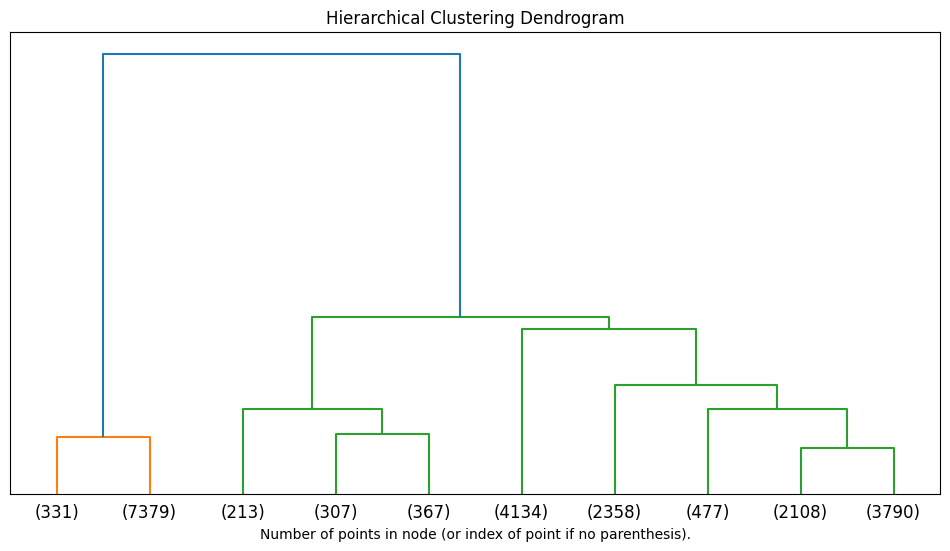

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
data = pd.read_csv('preprocessed_data.csv')

# Select relevant features
features = ['host_location', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'host_neighbourhood']
data = data[features]

# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
for feature in ['host_location', 'property_type', 'room_type', 'host_neighbourhood']:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# Perform Agglomerative clustering
agglomerative = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
clusters = agglomerative.fit_predict(data)

# Compute the linkage matrix
linkage_matrix = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram')
# Plot the dendrogram for the last 10 merged clusters
dendrogram(linkage_matrix, truncate_mode='lastp', p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.tick_params(axis='y', which='both', left=False, labelleft=False)  # Remove ticks and labels on y-axis
plt.show()


In [ ]:
import pandas as pd

# Read the CSV files
recommendations_df = pd.read_csv('top_100_unique_recommendations_dbscan.csv')
recommendation_kmeans_df = pd.read_csv('top_100_unique_recommendations_kmeans.csv')
recommendation_agg_df = pd.read_csv('top_100_unique_recommendations_agglomerative.csv')

# Combine the dataframes
recommendation_ensemble = pd.concat([recommendations_df, recommendation_kmeans_df, recommendation_agg_df], ignore_index=True)

# Drop 'algorithm_name' and 'similarity_score' columns
recommendation_ensemble.drop(columns=['algorithm_name', 'similarity_score'], inplace=True)

# Display the combined dataframe
print(recommendation_ensemble.head())

# Save the combined dataframe to a new CSV file
recommendation_ensemble.to_csv('recommendation_ensemble.csv', index=False)



   host_location       property_type        room_type  accommodates  \
0   New York, NY  Entire rental unit  Entire home/apt           4.0   
1   New York, NY        Entire condo  Entire home/apt           2.0   
2  Nashville, TN  Entire rental unit  Entire home/apt           3.0   
3   New York, NY    Entire townhouse  Entire home/apt           8.0   
4   New York, NY    Entire townhouse  Entire home/apt           4.0   

   bathrooms  bedrooms  review_scores_rating         host_neighbourhood  
0        2.0       2.0                  4.88               Prince's Bay  
1        1.0       1.0                  4.97         Washington Heights  
2        1.0       2.0                  5.00                 Park Slope  
3        1.0       4.0                  4.77           Prospect Heights  
4        1.5       2.0                  5.00  Prospect Lefferts Gardens  


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import cosine_similarity

# Load the ensembled recommendations
recommendation_ensemble = pd.read_csv('recommendation_ensemble.csv')

# Select relevant features
features = ['host_location', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating', 'host_neighbourhood']
recommendation_ensemble = recommendation_ensemble[features]

# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
for feature in ['host_location', 'property_type', 'room_type', 'host_neighbourhood']:
    le = LabelEncoder()
    recommendation_ensemble[feature] = le.fit_transform(recommendation_ensemble[feature])
    label_encoders[feature] = le


# Normalize numerical variables
scaler = MinMaxScaler()
recommendation_ensemble[['accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating']] = scaler.fit_transform(recommendation_ensemble[['accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating']])


# Spectral Clustering
num_clusters = 10 # Specify the number of clusters
spectral_clustering = SpectralClustering(n_clusters=num_clusters, random_state=42, affinity='nearest_neighbors')
clusters = spectral_clustering.fit_predict(recommendation_ensemble)

# Add clusters to the ensembled recommendations dataframe
recommendation_ensemble['cluster'] = clusters

def recommend_listings_spectral(user_input, num_recommendations=100, similarity_threshold=0.9, algorithm_name="SpectralClustering"):
    # Convert user input to a DataFrame
    user_data = pd.DataFrame([user_input], columns=features)

    # Convert categorical variables to numerical using Label Encoding
    for feature in ['host_location', 'property_type', 'room_type', 'host_neighbourhood']:
        le = label_encoders[feature]
        # Check if the user input value is in the label encoder classes
        if user_input[feature] in le.classes_:
            user_data[feature] = le.transform([user_input[feature]])[0]
        else:
            # Handle unknown labels by assigning the median value of the encoded labels
            user_data[feature] = int(recommendation_ensemble[feature].median())

    # If user input is a single data point, return the entire dataset sorted by similarity score
    if len(user_data) == 1:
        # Compute cosine similarity
        user_data_matrix = user_data.values.reshape(1, -1)  # Reshape to ensure proper input dimensions
        data_matrix = recommendation_ensemble.drop(columns=['cluster']).values  # Drop the 'cluster' column and convert to numpy array
        similarities = cosine_similarity(user_data_matrix, data_matrix)

        # Add similarity scores to the data dataframe
        recommendation_ensemble['similarity_score'] = similarities.flatten()

        # Filter listings based on similarity threshold
        similar_listings = recommendation_ensemble[recommendation_ensemble['similarity_score'] >= similarity_threshold].sort_values(by='similarity_score', ascending=False)

        # Limit the number of recommendations
        similar_listings = similar_listings.head(num_recommendations)

        # Add algorithm name as a new column
        similar_listings['algorithm_name'] = algorithm_name

        # Reverse label encoding for categorical variables
        for feature in ['host_location', 'property_type', 'room_type', 'host_neighbourhood']:
            le = label_encoders[feature]
            similar_listings[feature] = le.inverse_transform(similar_listings[feature].astype(int))

        # Inverse normalize numerical variables
        similar_listings[['accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating']] = scaler.inverse_transform(similar_listings[['accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating']])


        return similar_listings[['host_location', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating', 'host_neighbourhood', 'similarity_score', 'algorithm_name']]

    # Predict cluster for user input
    user_cluster = spectral_clustering.fit_predict(user_data)[0]

    # Recommend listings from the same cluster
    cluster_data = recommendation_ensemble[recommendation_ensemble['cluster'] == user_cluster].drop(columns=['cluster'])

    # Compute cosine similarity
    user_data_matrix = user_data.values.reshape(1, -1)  # Reshape to ensure proper input dimensions
    cluster_data_matrix = cluster_data.values  # No reshaping needed for cluster data
    similarities = cosine_similarity(user_data_matrix, cluster_data_matrix)

    # Add similarity scores to the cluster_data dataframe
    cluster_data['similarity_score'] = similarities.flatten()

    # Filter listings based on similarity threshold
    similar_listings = cluster_data[cluster_data['similarity_score'] >= similarity_threshold].sort_values(by='similarity_score', ascending=False)

    # Limit the number of recommendations
    similar_listings = similar_listings.head(num_recommendations)

    # Add algorithm name as a new column
    similar_listings['algorithm_name'] = algorithm_name

    # Reverse label encoding for categorical variables
    for feature in ['host_location', 'property_type', 'room_type', 'host_neighbourhood']:
        le = label_encoders[feature]
        similar_listings[feature] = le.inverse_transform(similar_listings[feature].astype(int))

    # Inverse normalize numerical variables
    similar_listings[['accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating']] = scaler.inverse_transform(similar_listings[['accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating']])

    return similar_listings[['host_location', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating', 'host_neighbourhood', 'similarity_score', 'algorithm_name']]

# Define a user input
user_inputs = [
    {
        'host_location': 'New York, United States','property_type': 'Entire bungalow','room_type': 'Entire home/apt','accommodates': 3,'bathrooms': 1,
        'bedrooms': 2,'review_scores_rating': 4.95, 'host_neighbourhood': 'West Bronx'
    },
    {
        'host_location': 'New York, NY','property_type': 'Private room in home','room_type': 'Entire home/apt','accommodates':2 ,'bathrooms': 1,
        'bedrooms': 1,'review_scores_rating': 4.2, 'host_neighbourhood': 'Ocean Hill'
    },
    {
        'host_location': 'New York, United States','property_type': 'Entire rental unit','room_type': 'Entire home/apt','accommodates': 4,'bathrooms': 1,
        'bedrooms': 1,'review_scores_rating': 4.5, 'host_neighbourhood': 'Prospect Lefferts Gardens'
    }
]
# Recommend listings using Spectral Clustering
recommended_listings_spectral = recommend_listings_spectral(user_input, num_recommendations=100, similarity_threshold=0.9, algorithm_name="SpectralClustering")

# Display the recommended listings
print(recommended_listings_spectral)

    host_location       property_type        room_type  accommodates  \
116  New York, NY  Entire rental unit  Entire home/apt           7.0   
218  New York, NY  Entire rental unit  Entire home/apt           7.0   
114  New York, NY  Entire rental unit  Entire home/apt           8.0   
216  New York, NY  Entire rental unit  Entire home/apt           8.0   
120  New York, NY  Entire rental unit  Entire home/apt           6.0   
..            ...                 ...              ...           ...   
259  New York, NY  Entire rental unit  Entire home/apt           4.0   
155  New York, NY  Entire rental unit  Entire home/apt           4.0   
161  New York, NY  Entire rental unit  Entire home/apt           2.0   
267  New York, NY  Entire rental unit  Entire home/apt           2.0   
163  New York, NY  Entire rental unit  Entire home/apt           2.0   

     bathrooms  bedrooms  review_scores_rating         host_neighbourhood  \
116        1.5       3.0                  4.73           P

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
features_data = data
silhouette_avg = silhouette_score(features_data, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6735550343195644


In [ ]:
from sklearn.metrics import calinski_harabasz_score

# Calculate the Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(features_data, clusters)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

Calinski-Harabasz Index: 237.44917696170629


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(features_data, clusters)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Davies-Bouldin Index: 0.5491294767037818


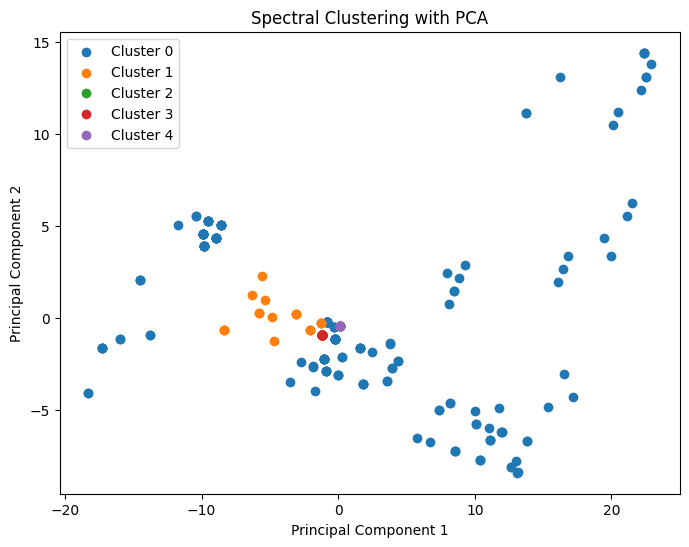

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
principal_components = pca.fit_transform(features_data)

# Add the principal components to the ensembled recommendations dataframe
recommendation_ensemble['Principal Component 1'] = principal_components[:, 0]
recommendation_ensemble['Principal Component 2'] = principal_components[:, 1]

# Visualize the principal components with cluster labels
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for cluster in set(clusters):
    cluster_data = recommendation_ensemble[recommendation_ensemble['cluster'] == cluster]
    plt.scatter(cluster_data['Principal Component 1'], cluster_data['Principal Component 2'], label=f'Cluster {cluster}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Spectral Clustering with PCA')
plt.legend()
plt.show()

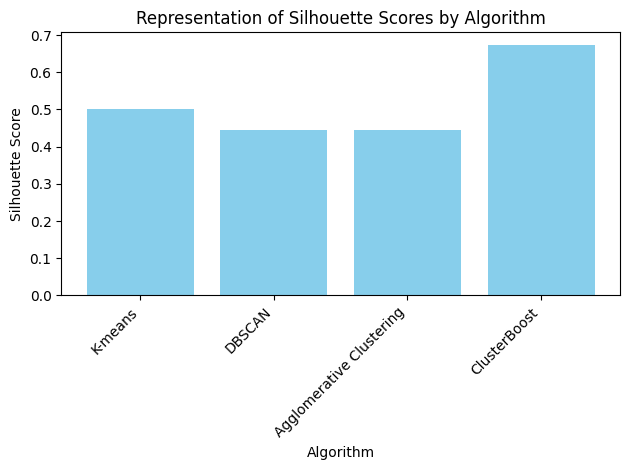

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(algorithm_scores):
    # Extract algorithm names and silhouette scores
    algorithms = [entry[0] for entry in algorithm_scores]
    scores = [entry[1] for entry in algorithm_scores]

    # Create histogram
    plt.bar(algorithms, scores, color='skyblue')

    # Add labels and title
    plt.xlabel('Algorithm')
    plt.ylabel('Silhouette Score')
    plt.title('Representation of Silhouette Scores by Algorithm')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Show plot
    plt.tight_layout()
    plt.show()

# Example input: list of tuples containing algorithm name and silhouette score
algorithm_scores = [
    ('K-means',0.5015125506922491),
    ('DBSCAN',0.4457425403442836),
    ('Agglomerative Clustering',0.4457425403442836),
    ('ClusterBoost',0.6735550343195644)
]

# Plot histogram
plot_histogram(algorithm_scores)




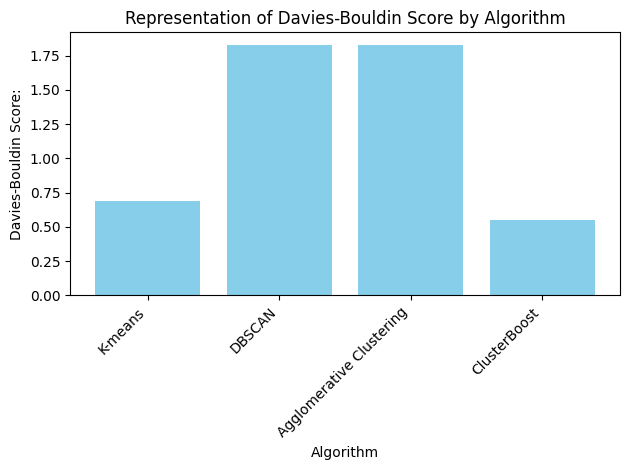

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(algorithm_scores):
    # Extract algorithm names and silhouette scores
    algorithms = [entry[0] for entry in algorithm_scores]
    scores = [entry[1] for entry in algorithm_scores]

    # Create histogram
    plt.bar(algorithms, scores, color='skyblue')

    # Add labels and title
    plt.xlabel('Algorithm')
    plt.ylabel('Davies-Bouldin Score:')
    plt.title('Representation of Davies-Bouldin Score by Algorithm')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Show plot
    plt.tight_layout()
    plt.show()

# Example input: list of tuples containing algorithm name and silhouette score
algorithm_scores = [
    ('K-means',0.6897327361407275),
    ('DBSCAN',1.8282769260875864),
    ('Agglomerative Clustering',1.8282769260875864),
    ('ClusterBoost',0.5491294767037818)
]

# Plot histogram
plot_histogram(algorithm_scores)




In [ ]:

Silhouette Score: 0.4457425403442836
Davies-Bouldin Score: 1.8282769260875864
Calinski-Harabasz Index: 66.46118377243164


Silhouette Score: 0.5015125506922491
Davies-Bouldin Score: 0.6897327361407275
Calinski-Harabasz Index: 48638.12822305441


Silhouette Score: 0.4457425403442836
Davies-Bouldin Score: 1.8282769260875864
Calinski-Harabasz Index: 66.46118377243164